In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random as rd
data = pd.read_csv("drive/My Drive/clean_tweet.csv",index_col=0)
data.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,tweet_text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [3]:
data[data.isnull().any(axis=1)].head(20)


,tweet_text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0
1014,NaN,0
1231,NaN,0
1421,NaN,0
1486,NaN,0


In [4]:
data.dropna(inplace=True) #NAN values are coming from just @username, delete them 
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
tweet_text    1596041 non-null object
target        1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [5]:
data[data.isnull().any(axis=1)].head() #No more null data


,tweet_text,target


In [6]:
data

,tweet_text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0
...,...,...
1596036,just woke up having no school is the best feel...,4
1596037,thewdb com very cool to hear old walt interviews,4
1596038,are you ready for your mojo makeover ask me fo...,4
1596039,happy th birthday to my boo of alll time tupac...,4


In [8]:
#Random sample of 100,000 points
sample_data = data.sample(frac=.8, random_state=2000)
sample_data


,tweet_text,target
1178330,finally it updates,4
835935,th place,4
799921,anybody in atlanta hiring if you are looking f...,4
1127201,omgoosh six flags ad sorry wanna go on thee bo...,4
709521,arggh that so so so bad wish you to come,0
...,...,...
877472,welcome aboard,4
162144,this is one of my all time favorite episodes q...,0
876197,probably faded earlier than want to admit but ...,4
660922,well tonight im babysitting stubborn year old ...,0


In [0]:
# x_data = sample_data['tweet_text'].sample(frac=.795, random_state=2000)
# y_data = sample_data['target'].sample(frac=.795, random_state=2000)
# x_data

In [0]:
# remaining_set = sample_data.loc[~sample_data['tweet_text'].index.isin(x_data.index), :]
# remaining_set


In [0]:
# x_train = data['tweet_text'].sample(frac=.90, random_state=2000)
# y_train = data['target'].sample(frac=.90, random_state=2000)
# remaining_set = data.loc[~data['tweet_text'].index.isin(x_train.index), :]
# remaining_set #no overlap

# x_validation = remaining_set['tweet_text'].sample(frac=1, random_state=2000)
# x_validation
# y_validation = remaining_set['target'].sample(frac=1, random_state=2000)
# y_validation


X = []
tweets = list(sample_data['tweet_text'])
for lines in tweets:
    X.append(lines)

In [11]:
len(X)

1276833

In [0]:
y = sample_data['target']

#1 == positive, 0 == negative
y = np.array(list(map(lambda x: 0 if x==0 else 1, y))) 

In [13]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, StratifiedKFold

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# k = 5
# folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))


X_train = X 
y_train = y


Using TensorFlow backend.


In [14]:
len(y_train)

1276833

In [15]:
len(X_train)

1276833

In [16]:
columns = ['polarity','tweet_id','date','query_string','username','tweet_text']


test = pd.read_csv("drive/My Drive/testdata.csv", sep=",", header = None, names=columns)
test

,polarity,tweet_id,date,query_string,username,tweet_text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [17]:
test.polarity.value_counts() 


4    182
0    177
2    139
Name: polarity, dtype: int64

In [0]:
test = test[test.polarity != 2] #Drop neutral rows for binary classification (postive or negative)


In [19]:
test.polarity.value_counts() #80,000 positive and negative examples 


4    182
0    177
Name: polarity, dtype: int64

In [20]:
x_test = test['tweet_text']
x_test

0      @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      Reading my kindle2...  Love it... Lee childs i...
2      Ok, first assesment of the #kindle2 ...it fuck...
3      @kenburbary You'll love your Kindle2. I've had...
4      @mikefish  Fair enough. But i have the Kindle2...
                             ...                        
492    After using LaTeX a lot, any other typeset mat...
494    On that note, I hate Word. I hate Pages. I hat...
495    Ahhh... back in a *real* text editing environm...
496    Trouble in Iran, I see. Hmm. Iran. Iran so far...
497    Reading the tweets coming out of Iran... The w...
Name: tweet_text, Length: 359, dtype: object

In [21]:
y_test = test['polarity']
y_test

0      4
1      4
2      4
3      4
4      4
      ..
492    4
494    0
495    4
496    0
497    0
Name: polarity, Length: 359, dtype: int64

In [0]:
X_test = []
tweets = list(test['tweet_text'])
for lines in tweets:
    X_test.append(lines)

y_test = test['polarity']

#1 == positive, 0 == negative
y_test = np.array(list(map(lambda x: 0 if x==0 else 1, y_test))) 

In [0]:
# X_train

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def tokenize(list):
  
  tokenizer = Tokenizer(num_words=5000)
  tokenizer.fit_on_texts(list)

  tokenized_list = tokenizer.texts_to_sequences(list)
  # X_train = tokenizer.texts_to_sequences(X_train)
  # X_test = tokenizer.texts_to_sequences(X_test)
  vocab_size = len(tokenizer.word_index) + 1

  return tokenized_list, tokenizer, vocab_size

In [0]:
# X_train

In [0]:


def pad(tokenized_list, maxlen):

  padded_list = pad_sequences(tokenized_list, padding='post', maxlen=maxlen)
  
  return padded_list




In [27]:
len(X_train)


1276833

In [28]:
len(X_test)

359

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

def embedding_function(vocab_size, tokenizer):

  embeddings_dictionary = dict()
  glove_file = open('drive/My Drive/glove.6B.200d.txt', encoding="utf8")

  for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
  glove_file.close()

  embedding_matrix = zeros((vocab_size, 200))
  for word, index in tokenizer.word_index.items():
      embedding_vector = embeddings_dictionary.get(word)
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector

  return embedding_matrix

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

def get_model(embedding_matrix, maxlen):

  model = Sequential()

  embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
  model.add(embedding_layer)

  model.add(Conv1D(128, 5, activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

  return model 

In [0]:
# model = get_model()
# model.summary



In [0]:
# y_test


In [0]:
# X_test


In [0]:
X_train, tokenizer, vocab_size = tokenize(X_train)
X_test, tokenizer, vocab_size = tokenize(X_test)

# vocab_size, tokenizer = get_vocab_size(tokenizer)

X_train = pad(X_train, 50)
X_test = pad(X_test, 50)

embedding_matrix = embedding_function(vocab_size, tokenizer)

In [32]:
#Implement K-Fold cross validation

early_stopping = keras.callbacks.EarlyStopping(patience=3, verbose=2, mode='auto', min_delta=0.00005)

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
cvscores = []
i = 0


for train, test in folds.split(X_train, y_train):
  print("Fold: ", i)

  model = get_model(embedding_matrix, 50)

  history = model.fit(X_train[train], y_train[train], batch_size=32, epochs=15, verbose=1)

  scores = model.evaluate(X_train[test], y_train[test], verbose=1)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  i += 1





Fold:  0











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
851222/851222 [==============================] - 157s 184us/step - loss: 0.5180 - acc: 0.7425
Epoch 2/15
851222/851222 [==============================] - 152s 178us/step - loss: 0.4758 - acc: 0.7730
Epoch 3/15
851222/851222 [==============================] - 152s 178us/step - loss: 0.4604 - acc: 0.7828
Epoch 4/15
851222/851222 [==============================] - 151s 178us/step - loss: 0.4492 - acc: 0.7895
Epoch 5/15
851222/851222 [==============================] - 152s 178us/step - loss: 0.4401 - acc: 0.7952
Epoch 6/15
851222/851222 [==============================] - 153s 180us/step - loss: 0.4330 - acc: 0.7991
Epoch 7/15
851222/851222 [==============================] - 153s 180us/step - loss: 0.4267 - acc: 0.8026
Epoch 8/15
851222/851222 [==============================] - 153s 179us/step - loss: 0.4213 - acc: 0.8061
Epoch 9/15
851222/851222 [==================

In [0]:
# history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, callbacks=[early_stopping])



In [33]:
score = model.evaluate(X_test, y_test, verbose=1)

359/359 [==============================] - 0s 203us/step


In [34]:
cvscores

[76.07486648604956, 76.86291002822728, 76.99331079317508]

In [35]:
#####RESULTS#####

print("Test Score:", score[0])
print("Test Accuracy:", score[1]) #Train on 80440 samples, validate on 20111 samples: Test Accuracy: 0.7966573819476582, Test Score: 0.5130204541769532, 6 epochs


#K-fold = 5, epochs 10, datapoints 80440: Test Score = 1.6172082663246516 , Test ACC = 0.49582172710251343

Test Score: 1.0916534951968446
Test Accuracy: 0.5208913650685366


In [36]:
print("Test Score:", score[0]) #6 epochs = 0.47578218537784883 #On FULL DATA SET FOR TRAINING
print("Test Accuracy:", score[1]) #6 epochs = 0.7883008359866555
#Dropping rows with neutral label improved acc(better than neutral points being labeled as positive (.777))
#(and better than neutral points being labeled as negative(.668))

Test Score: 1.0916534951968446
Test Accuracy: 0.5208913650685366


In [41]:
history.history

{'acc': [0.741518663756621,
  0.7722474278149803,
  0.7823399771153932,
  0.788861190147671,
  0.7941524067746406,
  0.7985637119342771,
  0.8018871692698714,
  0.8053386778072898,
  0.8084765196389652,
  0.8105135910493836,
  0.8130276238155536,
  0.8148884779766482,
  0.8169690163085992,
  0.8186783236334126,
  0.8200199242965092],
 'loss': [0.5189395088616251,
  0.4765759818194194,
  0.46123312435613,
  0.45000497203841433,
  0.44140261882966936,
  0.4337806444184829,
  0.4275795019844755,
  0.4219105582895387,
  0.4166904763063167,
  0.4127212033903902,
  0.4082759998406842,
  0.4047786268605178,
  0.4013391027201175,
  0.3982004742521756,
  0.39525765152774855]}

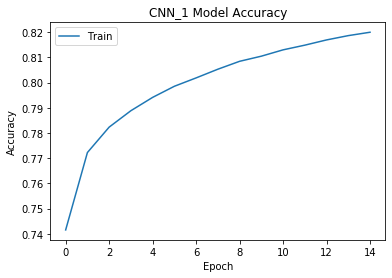

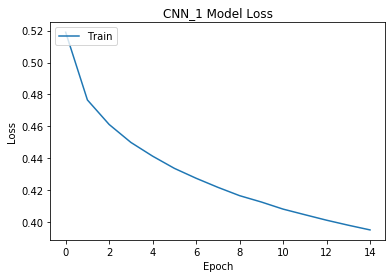

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])

plt.title('CNN_1 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])

plt.title('CNN_1 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

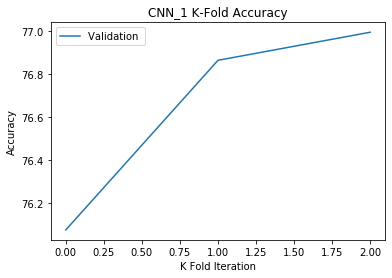

In [46]:
plt.plot(cvscores)
#plt.plot(history.history['val_acc'])

plt.title('CNN_1 K-Fold Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K Fold Iteration')
plt.legend(['Validation '], loc = 'upper left')
plt.show()